## <span style="color:blue">  Numerical exercises 2</span>

### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

For the integral evaluation with importance sampling:

- 1. I choose 𝑝(𝑥) = 2(1-x). That's because in this way it's more probably to extract points near 1, which are the ones whit higher contribute to the estimation of the integral
- 2. 𝑓(𝑥) is the function we want to integrate.
- 3. Calculate 𝑔(𝑥) = 𝑓(𝑥) / 𝑝(𝑥).
- 4. calculate the mean of 𝑔(𝑥) from the extraction.

So the estimated value of the integral is obtained from:

$$ \hat{I} = \int_0^1 \frac{f(x)}{p(x)} p(x)dx = \int_0^1 g(x)p(x)dx \approx \ <(g(x_i)>$$
- This way it's possible to use data blocking methods. I will use 100 blocks of $10^4$ iteration each
- Note that to extract $x_i$ I use the method of cumulative inversion function for an uniform distribution [0,1].


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

In [79]:
plt.rcParams.update({'font.size': 15})

In [80]:
data = np.loadtxt("../c++/es 2/Unif.dat")
means_unif = data[:, 0]  
stds_unif = data[:, 1]  

In [81]:
data = np.loadtxt("../c++/es 2/IS.dat")
means_IS = data[:, 0]  
stds_IS = data[:, 1]  

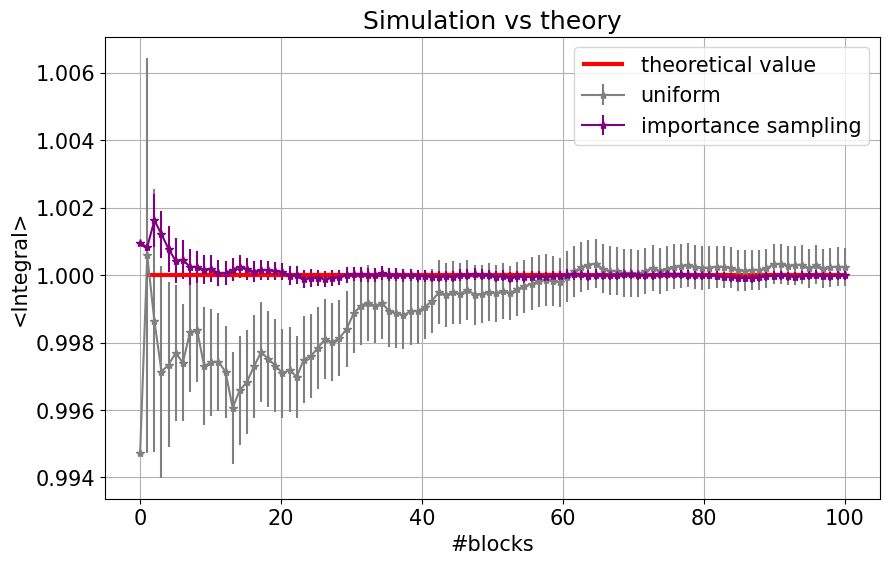

best estimated integral value unif =  1.00023 +/- 0.00057
best estimated integral value IS =  0.99999 +/- 0.00013


In [82]:
x = np.linspace(0,100,100)
fig = plt.figure(figsize = (10,6) )
plt.errorbar(x,means_unif,yerr=stds_unif, label="uniform",marker="*",color="grey")
plt.errorbar(x,means_IS,yerr=stds_IS, label="importance sampling",marker="*",color="purple")
plt.hlines(1,1,N,color="red", label = "theoretical value",linewidth=3)
plt.legend()
plt.xlabel('#blocks')
plt.ylabel('<Integral>')
plt.grid(True)
plt.title("Simulation vs theory")

plt.show()
print("best estimated integral value unif = ", round(means_unif[-1],5), "+/-", round(stds_unif[-1],5))
print("best estimated integral value IS = ", round(means_IS[-1],5), "+/-", round(stds_IS[-1],5))

You can see in the plot how the importance sampling has a smaller variance (about 1/5)

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

Lattice: 
optimized parameters k =  [0.9992] +- [0.0001]

Continuum:
optimized parameters k =  [0.9947] +- [0.0003]


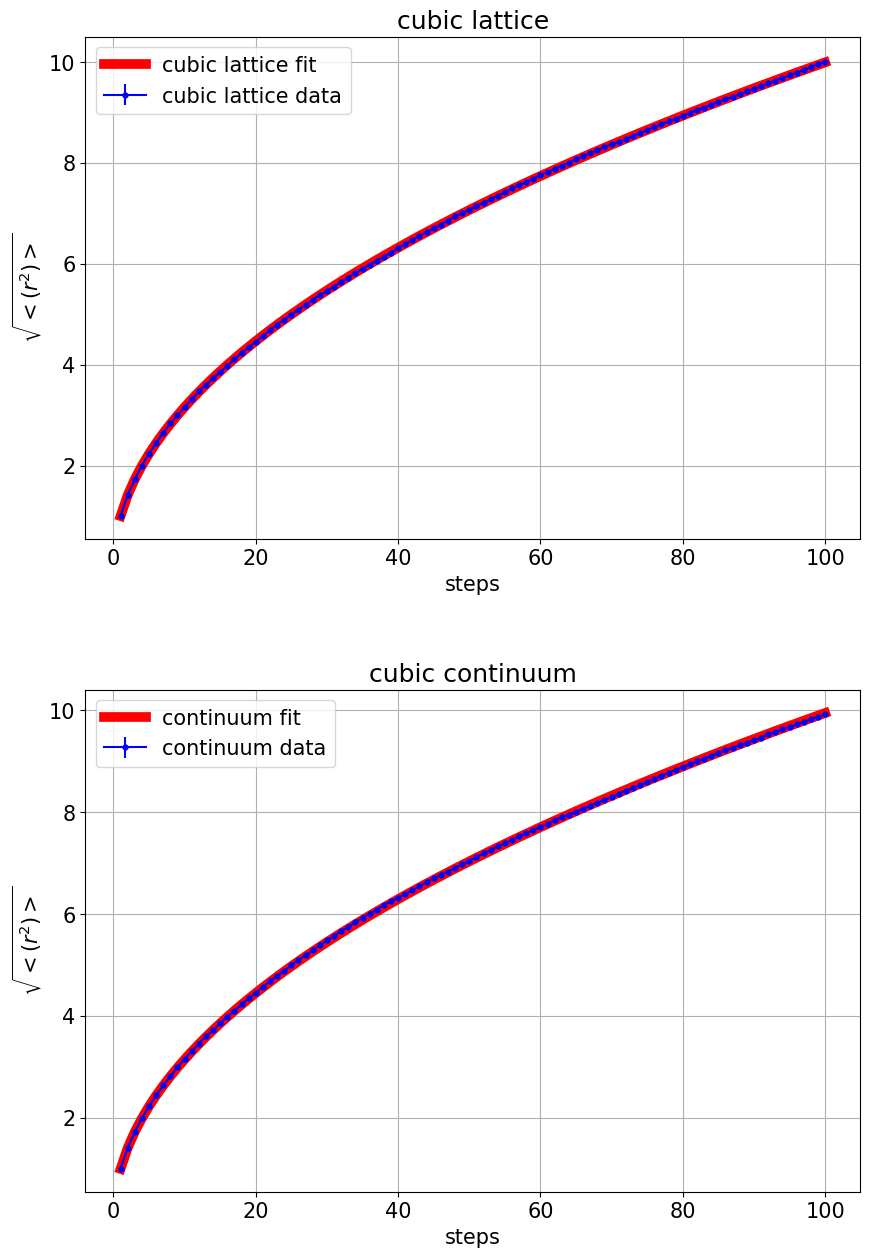

In [83]:
r_discr, err_discr = np.loadtxt("../c++/es 2/Discrete_RW.dat", usecols=(0,1), unpack = 'true')
r_cont, err_cont = np.loadtxt("../c++/es 2/Continue_RW.dat", usecols=(0,1), unpack = 'true')
z = np.arange(100) +1

def f(x,k):
    return k*np.sqrt(x)

#lattice fit 
p_opt, p_cov = curve_fit(f,z, r_discr[z>0])
y_fit = f(z ,p_opt)
#continuum fit 
pc_opt, pc_cov = curve_fit(f,z, r_cont[z>0])
yc_fit = f(z ,pc_opt)


fig = plt.figure(figsize =(10,15) )

print("Lattice: ")
print("optimized parameters k = ",np.round(p_opt,4),"+-",np.round(np.sqrt(np.diagonal(p_cov)),4))
print()
print("Continuum:")
print("optimized parameters k = ",np.round(pc_opt,4),"+-",np.round(np.sqrt(np.diagonal(pc_cov)),4))


plt.subplot(2,1,1, title = "cubic lattice")
plt.errorbar(z ,r_discr,yerr=err_discr, label= "cubic lattice data",marker=".",color="blue",ms=7)
plt.plot(z,y_fit, label= "cubic lattice fit",color="red",lw=7)
plt.legend(loc = "best")
plt.xlabel('steps')
plt.ylabel('$\sqrt{<(r^2)>}$')
plt.grid(True)

plt.subplot(2,1,2, title = "cubic continuum")
plt.errorbar(z ,r_cont , yerr=err_cont , label = "continuum data",marker=".",color="blue",ms=7)
plt.plot(z,yc_fit, label= "continuum fit",color="red",lw=7)
plt.xlabel('steps')
plt.ylabel('$\sqrt{<(r^2)>}$')
plt.grid(True)
plt.legend(loc = "best")

plt.subplots_adjust(hspace=0.3)
plt.show()

As we can see from the plots, the simulated RWs have a diffusive behavior, the red line represent a function $f(N)=k\sqrt{N}$, the blue errorbar plot are the two different types of random walks. 